# Linear regression example

Great explanations of Linear regression:
- https://scikit-learn.org/stable/modules/linear_model.html
- https://en.wikipedia.org/wiki/Ordinary_least_squares#Matrix/vector_formulation

From sklearn docs: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Import libs

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score

# Load data, features, training/testing sets

In [19]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use just one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split into testing/training set
X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_y, test_size=0.33)


# Train the model and measure test results

In [20]:
# Create the linear regression object
model = linear_model.LinearRegression()

model.fit(X_train, y_train)
print(model.coef_)

# Make a prediction vector using the test set
y_pred = model.predict(X_test)

# Coefficients
print("Coefficients:")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
# Coeff. of determination -- 1 is a perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Coefficients:
Mean squared error: 3681.3865585115655
Coefficient of determination: 0.3129601789981946


# Plot the results

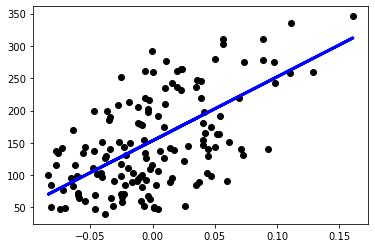

In [21]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks()
plt.yticks()

plt.show()